In [356]:
import pandas as pd
import numpy as np

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns

raw_data = pd.read_csv('train.csv', index_col='PassengerId')

print("Предварительная инициализация завершена")

Предварительная инициализация завершена


# Титаник

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Titanic_in_color.png/640px-Titanic_in_color.png?uselang=ru)

**Титаник** - крупнейшее пассажирское судно в мировой истории в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года.

[Википедия](https://ru.wikipedia.org/wiki/Титаник)

**Дисклеймер**: *Данные сгенерированы синтетически, но их описание основано на реальных фактических данных Титаника.

# ОПИСАНИЕ ДАННЫХ

| Заголовок   | Описание                                                                                                                                       |
|-------------|:-----------------------------------------------------------------------------------------------------------------------------------------------|
| PassengerId | Уникальный номер пассажира                                                                                                                     |
| Survival    | Маркер, означающий удалось ли выжить пассажиру                                                                                                 |
| Pclass      | Класс каюты. Варианты - Первый класс(Самый престижный), Второй класс, Третий класс                                                             |
| Name        | Фамилия, Имя пассажира                                                                                                                         |
| Sex         | Пол пассажира                                                                                                                                  |
| Age         | Количество лет пассажиру в годах. Если меньше года, то указан как дробный.                                                                     |
| Sibsp       | Количество братьев, сестер (могут быть сводными) или супругов на борту Титаника                                                                |
| Parch       | Количество родителей или их детей (могут быть неусыновленные) на борту Титаника. Некоторые дети путешествовали с няней, для них указывается 0. |
| Ticket      | Номер билета пассажира                                                                                                                         |
| Fare        | Тариф пассажира                                                                                                                                |
| Cabin       | Номер каюты                                                                                                                                    |
| Embarked    | Порт, в котором пассажир вступил на борт Титаника C = Шербуре (Cherbourg), Q =  Квинстаун (Queenstown), S = Саутгемптоне (Southampton)         |



# Оценка качества данных (Data quality assessment)

In [357]:
raw_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [358]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Survived  100000 non-null  int64  
 1   Pclass    100000 non-null  int64  
 2   Name      100000 non-null  object 
 3   Sex       100000 non-null  object 
 4   Age       96708 non-null   float64
 5   SibSp     100000 non-null  int64  
 6   Parch     100000 non-null  int64  
 7   Ticket    95377 non-null   object 
 8   Fare      99866 non-null   float64
 9   Cabin     32134 non-null   object 
 10  Embarked  99750 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 9.2+ MB


Всего 100_000 записей из них нулевые значения встречаются в следующих столбцах:

Age - сведения о возрасте некоторых пассажиров, по тем или иным причинам, не всегда удавалось определить.
Ticket, Fare, Cabin - сведения о билетах, тарифах и каютах пассажиров по тем или иным причинам не указаны.
Embarked - сведение о порте, где вступил на борт пассажир отсутствует.

В дальнейших анализах и расчётах это следует принять во внимание.

In [359]:
raw_data.index.value_counts().count()

100000

PassengerId имеет 100_000 уникальных значений, что подразумевает уникальность каждого пассажира.

In [360]:
stats_survived = raw_data.groupby(by='Survived').Survived.count()
stats_survived.index

Int64Index([0, 1], dtype='int64', name='Survived')

Данные по Survived содержат только значения 0 и 1, что полностью совпадает с описанием "погиб" и "выжил". Данные корректные.

In [361]:
raw_data.Pclass.value_counts().index

Int64Index([3, 1, 2], dtype='int64')

Данные по Pclass содержат только значения 1,2,3 - что полностью совпадает с классами кают. Данные корректные.

In [362]:
(['Неверный тип данных', len([x for x in raw_data.Name if type(x) != str])],
 ['Не указана фамилия или имя', len([False for x in raw_data.Name if len(x.split(' ')) != 2])],
 )

(['Неверный тип данных', 0], ['Не указана фамилия или имя', 0])

По значениям Name каких-либо замечаний не выявлено, все значения строками и везде указаны имя и фамилия пассажира.

In [363]:
sex_stats = raw_data.Sex.value_counts()
sex_stats.index

Index(['male', 'female'], dtype='object')

Значения Sex имеют только корректные значения "мужчина" и "женщина".

In [364]:
raw_data.Age.describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

Значения по возрасту пассажиров лежат в корректных границах продолжительности жизни людей. Можно утверждать, что все не нулевые данные имеют корректные значения.

In [365]:
raw_data.SibSp.value_counts().index

Int64Index([0, 1, 2, 3, 4, 8, 5], dtype='int64')

Количество братьев, сестер (могут быть сводными) или супругов на борту Титаника указаны в пределах от 0 до 8 и имеют целые значения. Данные корректные.

In [366]:
raw_data.Parch.value_counts().index

Int64Index([0, 1, 2, 3, 4, 5, 9, 6], dtype='int64')

Количество родителей или их детей (могут быть неусыновленные) на борту Титаника указаны в пределах от 0 до 9 и имеют целые значения. Данные корректные.

In [367]:
def converter(x):
    c, n = '', ''
    x = str(x).replace('.', '').replace('/', '').replace(' ', '')
    for i in x:
        if i.isnumeric():
            n += i
        else:
            c += i
    if n != '':
        return c, int(n)
    return c, np.nan


ticket_types = raw_data.Ticket.apply(lambda x: converter(x)[0])
ticket_numbers = raw_data.Ticket.apply(lambda x: converter(x)[1])

In [368]:
ticket_types.value_counts()

           70722
PC          6375
A           6087
nan         4623
CA          2448
STONO       1928
SCPARIS     1248
SOTONOQ      992
WC           711
PP           622
FCC          577
SCParis      530
SCAH         525
WEP          344
SOC          339
FC           296
SOTONO       290
C            220
SC           164
PPP          149
SOPP         134
SCA          104
AQ           103
SCOW         101
SWPP          69
LP            56
Fa            54
AS            44
STONOQ        38
CASOTON       37
SOP           36
SP            34
Name: Ticket, dtype: int64

Колонка "Номер билета пассажира" содержат значения, которые являются строками. Значения могут состоять из двух частей - "Тип билета"(буквенное обозначение) и "Номер билета"(цифровое обозначение). Встречается 30 уникальных буквенных значений. Для дальнейших исследований скорее всего значения понадобиться привести в порядок, а также учесть, что какая-либо часть или вовсе весь номер билета может быть не указан.

In [369]:
raw_data.Fare.describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

> Fares varied depending on class and season. Third Class fares from London, Southampton, or Queenstown cost £7 5s (equivalent to £700 today) while the cheapest First Class fares cost £23 (£2,300 today). The most expensive First Class suites were to have cost up to £870 in high season (£88,000 today)
[Wiki](https://en.wikipedia.org/wiki/Titanic)

Значения "Тариф для пассажира" указан в границах от 0.68 до 744.66, что в некоторой степени укладывается в рамки, в соответствии с данными из википедии. Можно предположить, что значения указаны в фунтах стерлингах. При исследовании данных Fare нужно обратить внимание, что тарифы для некоторых пассажиров не указаны вовсе, а также указаны ниже 2 фунтов, что вызывает сомнения, так как по данным википедии стоимость для пассажиров третьего(наименьшего) класса кают начинается с 2 фунтов.

In [370]:
raw_data.Cabin.value_counts()

C19828    6
C6906     5
C13699    5
C14534    5
B11110    5
         ..
A21234    1
A4905     1
C7208     1
A5788     1
D17243    1
Name: Cabin, Length: 26992, dtype: int64

Из 32134 указанных кают 26992 уникальных. Буквенные обозначения кают указывают на палубу.

In [371]:
raw_data.Embarked.value_counts()

S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64

Три уникальных порта. Данные указаны верно. C = Шербуре (Cherbourg), Q = Квинстаун (Queenstown), S = Саутгемптоне (Southampton)

# Исследование данных (Data exploration)

**При исследовании данных Титаника, чаще всего задаются вопросы связанные с шансом на выживание. Поэтому "шанс на выживание" основным ориентиром в этой исследовательской работе.

In [372]:
stats_survived = pd.DataFrame([['Погибло', stats_survived[0], stats_survived[0] / 100_000 * 100],
                               ['Выжило', stats_survived[1], stats_survived[1] / 100_000 * 100],
                               ['Итого', 100_000, 100]], columns=['', 'Количество', '%'])
stats_survived

,,Количество,%
0,Погибло,57226,57.226
1,Выжило,42774,42.774
2,Итого,100000,100.000


<AxesSubplot:title={'center':'Данные о погибших и выживших пассажиров'}, ylabel='Количество'>

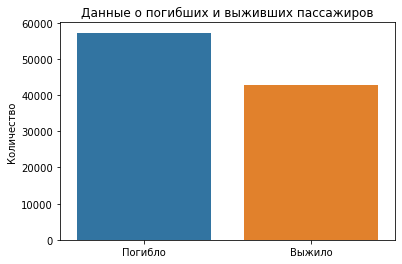

In [373]:
plt.title('Данные о погибших и выживших пассажиров')
sns.barplot(x=stats_survived.iloc[:2, 0], y=stats_survived.iloc[:2, 1])

**Большинство пассажиров 57% (~57тыс) погибло.**

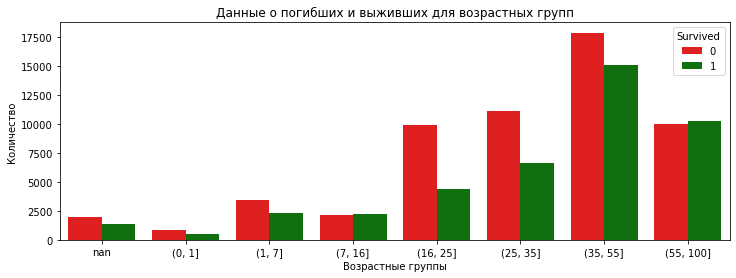

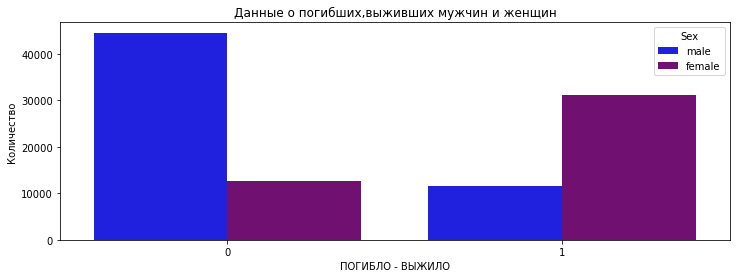

Age_Range  Survived
(0, 1]     0             815
           1             476
(1, 7]     0            3435
           1            2325
(16, 25]   0            9935
           1            4351
(25, 35]   0           11138
           1            6624
(35, 55]   0           17869
           1           15096
(55, 100]  0            9956
           1           10286
(7, 16]    0            2142
           1            2260
nan        0            1936
           1            1356
Name: Survived, dtype: int64


In [374]:
raw_data['Age_Range'] = pd.cut(raw_data.Age, [0, 1, 7, 16, 25, 35, 55, 100])
raw_data['Age_Range'] = raw_data.Age_Range.astype('str')
raw_data['Age_Range'] = raw_data.Age_Range.fillna('nan')

plt.figure(figsize=(12, 4))
plt.title('Данные о погибших и выживших для возрастных групп')
age_order = ['nan', '(0, 1]', '(1, 7]', '(7, 16]', '(16, 25]', '(25, 35]', '(35, 55]', '(55, 100]']
sns.countplot(data=raw_data, x='Age_Range', hue="Survived", order=age_order, palette=["r", "g"]).set(
    xlabel="Возрастные группы", ylabel="Количество")
plt.show()

plt.figure(figsize=(12, 4))
plt.title('Данные о погибших,выживших мужчин и женщин')
sns.countplot(data=raw_data, x='Survived', hue="Sex", palette=["blue", "purple"]).set(xlabel="ПОГИБЛО - ВЫЖИЛО",
                                                                                      ylabel="Количество")
plt.show()

print(raw_data.loc[:, ['Age_Range', 'Survived']].groupby(by=['Age_Range', 'Survived']).Survived.count())

**Выделяются возрастные группы в границах 16 лет до 35 лет, а также младенцы до 1 года - почти в 2 раза больше погибших пассажиров этих возрастов, чем выживших. Им менее повезло чем остальным, остальные же пассажиры (в возрасте от 1 года до 16 и старше 35 лет) имели по статистике почти равный шанс как спастись, так и погибнуть. Кроме того, погибло гораздо больше пассажиров мужского пола, чем женского**

## Братья, сёстры, супруги, родители и дети ( SibSp, Parch)

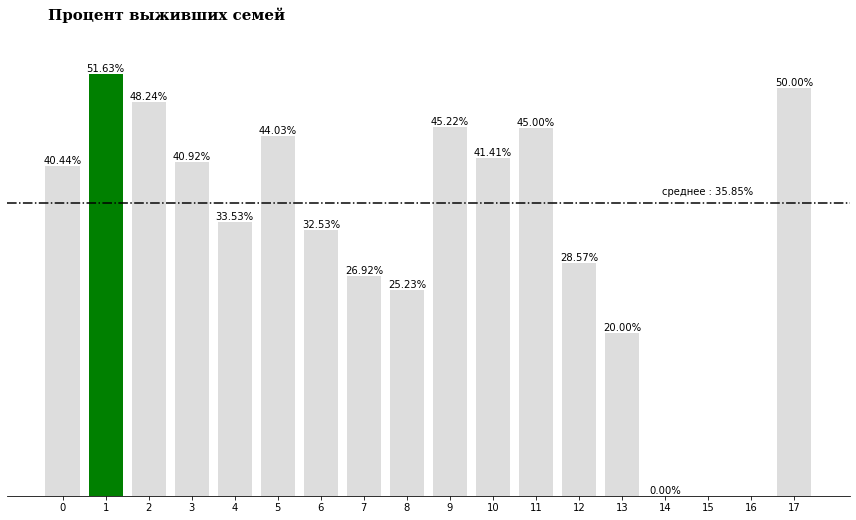

0     61853
1     14212
2     10789
3      8810
4      1870
5      1274
6       498
9       314
10      128
8       111
7       104
11       20
12        7
13        5
14        3
17        2
Name: Family, dtype: int64


In [375]:
raw_data['Family'] = raw_data.SibSp + raw_data.Parch
family_ratio = raw_data.groupby('Family')['Survived'].mean() * 100
mean = family_ratio.mean()

fig, ax = plt.subplots(1, 1, figsize=(12, 7))

color_map = ['#ddd' for _ in range(len(family_ratio))]
color_map[np.argmax(family_ratio)] = sns.light_palette('g')[5]

bars = ax.bar(family_ratio.index, family_ratio, color=color_map)

ax.spines[["top", "right", "left"]].set_visible(False)
ax.bar_label(bars, fmt='%.2f%%')

ax.axhline(mean, color='#000', linestyle='dashdot')

ax.annotate(f"среднее : {mean :.4}%", xy=(15, mean + 1), ha='center')

fig.text(0.06, 1, 'Процент выживших семей', fontsize=15, fontweight='bold', fontfamily='serif')

ax.set_yticks([])
ax.set_xticks(np.arange(0, max(family_ratio.index) + 1))
ax.set_ylim(0, 57)
fig.tight_layout()
plt.show()
print(raw_data.Family.value_counts())

**Чем большее количество человек было в семье, тем меньше шансов на спасение. Больший шанс на спасение среди семей имела семья в количестве 2 человек.**

## Корреляция данных

<AxesSubplot:>

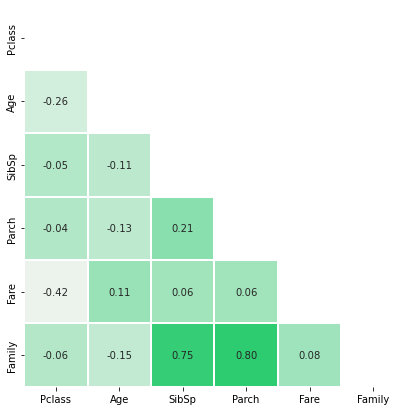

In [376]:
plt.figure(figsize=(12, 7))
feature_lst = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family']
corr = raw_data[feature_lst].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(raw_data[feature_lst].corr(method='pearson'), square=True, annot=True, fmt='.2f', linewidth=2,
            cbar=False, cmap=sns.light_palette("#2ecc71", as_cmap=True),
            mask=mask
            )

Видна сильная обратная связь Fare(Тариф) и Placs(класса каюты), что ожидаемо. Также сильные связи между Family(Семья), SibSp(супруги, братья, сёстры), Parch(родители дети), что тоже ожидаемо. Остаётся посмотреть распределение между возрастом/классом каюты и между возрастом/тарифом, хотя у них наблюдается слабая связь (-0.26 b 0.11). Т.к. класс каюты и тариф ожидаемо связаны, то посмотрим как распределяется возраст и тариф пассажира.

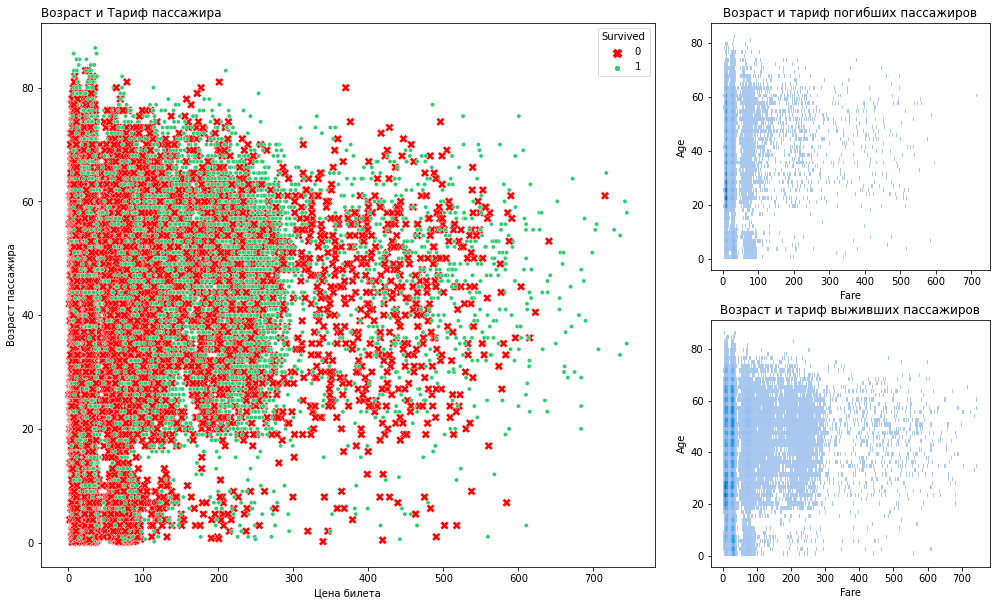

In [377]:
not_nil_age_fare = raw_data.loc[:, ['Survived', 'Fare', 'Age']].dropna()

fig = plt.figure(figsize=(17, 10))
grid_spec = fig.add_gridspec(2, 3)
ax = fig.add_subplot(grid_spec[:, :2])

sns.scatterplot(x='Fare', y='Age', hue='Survived', size='Survived', style='Survived', palette=['r', '#2ecc71'], style_order=[1, 0],
                data=not_nil_age_fare,
                ax=ax).set(
    xlabel="Цена билета", ylabel="Возраст пассажира", )
ax.set_title(f'Возраст и Тариф пассажира', loc='left')

for status_survived in [0, 1]:
    ax = fig.add_subplot(grid_spec[status_survived, 2])
    sns.histplot(x='Fare', y='Age', data=not_nil_age_fare[not_nil_age_fare['Survived'] == status_survived], ax=ax, )
    if status_survived == 1:
        ax.set_title(f'Возраст и тариф выживших пассажиров', loc='center')
    else:
        ax.set_title(f'Возраст и тариф погибших пассажиров', loc='center')

plt.show()

**На графиках выше можно наблюдать разную плотность тарифа(цены билета) для разного возраста, в зависимости выжил пассажир или нет.**